In [1]:
import h3 
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import folium 
import os 
import random
import plotly.graph_objects as go
from folium import plugins
from tqdm import tqdm
from plotly.subplots import make_subplots
import missingno as msno 
import json
import geojson
import matplotlib
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

%matplotlib inline 
get_ipython().run_line_magic('matplotlib', 'inline')

In [26]:
df = pd.read_csv('covid_worldwide.csv', index_col=0)
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,,,,,,,
1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...
227,Diamond Princess,712,13,699,0,NaN,NaN
228,Vatican City,29,NaN,29,0,NaN,799
229,Western Sahara,10,1,9,0,NaN,"626,161"


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     225 non-null    object
 3   Total Recovered  210 non-null    object
 4   Active Cases     212 non-null    object
 5   Total Test       213 non-null    object
 6   Population       228 non-null    object
dtypes: object(7)
memory usage: 14.4+ KB


In [28]:
df.describe()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231,231,225,210,212,213,228
unique,231,231,213,210,181,212,228
top,Isle of Man,"1,576,313",38,"29,740,877",0,"78,646","3,378,078"
freq,1,1,3,1,8,2,1


In [29]:
df.duplicated().sum()

0

In [30]:
df.shape

(231, 7)

In [31]:
df.isnull().sum()

Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [32]:
df.fillna(0 , inplace = True)

In [33]:
df.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [34]:
df.columns = df.columns.str.replace(' ', '_')

In [35]:
df['Total_Deaths'] = df['Total_Deaths'].astype(str).str.replace(',', '').astype(float)
df['Total_Cases'] = df['Total_Cases'].astype(str).str.replace(',', '').astype(float)
df['Total_Recovered'] = df['Total_Recovered'].astype(str).str.replace(',', '').astype(float)
df['Active_Cases'] = df['Active_Cases'].astype(str).str.replace(',', '').astype(float)
df['Total_Test'] = df['Total_Test'].astype(str).str.replace(',', '').astype(float)
df['Population'] = df['Population'].astype(str).str.replace(',', '').astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total_Cases      231 non-null    float64
 2   Total_Deaths     231 non-null    float64
 3   Total_Recovered  231 non-null    float64
 4   Active_Cases     231 non-null    float64
 5   Total_Test       231 non-null    float64
 6   Population       231 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.4+ KB


In [37]:
Topdeaths = df[['Total_Deaths', 'Country']].sort_values(by='Total_Deaths', ascending = False)
Topdeaths = Topdeaths.head(10)
Topdeaths.head(10)

,Total_Deaths,Country
Serial Number,,
1,1132935.0,USA
5,697074.0,Brazil
2,530740.0,India
10,395108.0,Russia
19,332198.0,Mexico
35,218931.0,Peru
9,204171.0,UK
8,186833.0,Italy
4,165711.0,Germany


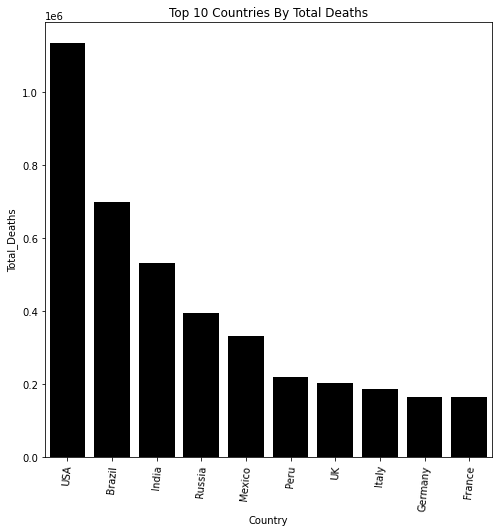

In [39]:
plt.figure(figsize = (8,8))
graph = sns.barplot(y = 'Total_Deaths', x = 'Country', color = 'black', data = Topdeaths)
graph.set_title('Top 10 Countries By Total Deaths')
plt.xticks(rotation = 85)
plt.show()

In [41]:
Toprecovered = df[['Total_Recovered', 'Country']].sort_values(by='Total_Recovered', ascending = False)
Toprecovered = Toprecovered.head(10)
Toprecovered.head(10)

,Total_Recovered,Country
Serial Number,,
1,101322779.0,USA
2,44150289.0,India
3,39264546.0,France
4,37398100.0,Germany
5,35919372.0,Brazil
7,29740877.0,S. Korea
8,25014986.0,Italy
9,24020088.0,UK
6,21567425.0,Japan


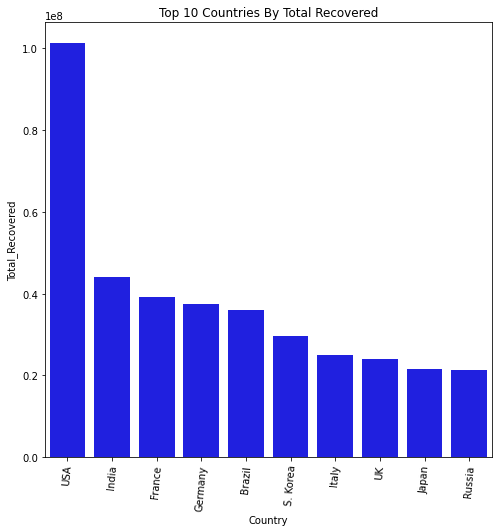

In [43]:
plt.figure(figsize = (8,8))
graph = sns.barplot(y = 'Total_Recovered', x = 'Country', color = 'blue', data = Toprecovered)
graph.set_title('Top 10 Countries By Total Recovered')
plt.xticks(rotation = 85)
plt.show()

In [49]:
compare = df[['Total_Deaths', 'Country', 'Total_Recovered']].sort_values(by = 'Total_Deaths', ascending = False)
compare = compare.head(10)
compare.head(10)

,Total_Deaths,Country,Total_Recovered
Serial Number,,,
1,1132935.0,USA,101322779.0
5,697074.0,Brazil,35919372.0
2,530740.0,India,44150289.0
10,395108.0,Russia,21356008.0
19,332198.0,Mexico,6606633.0
35,218931.0,Peru,4258688.0
9,204171.0,UK,24020088.0
8,186833.0,Italy,25014986.0
4,165711.0,Germany,37398100.0


<function matplotlib.pyplot.show(close=None, block=None)>

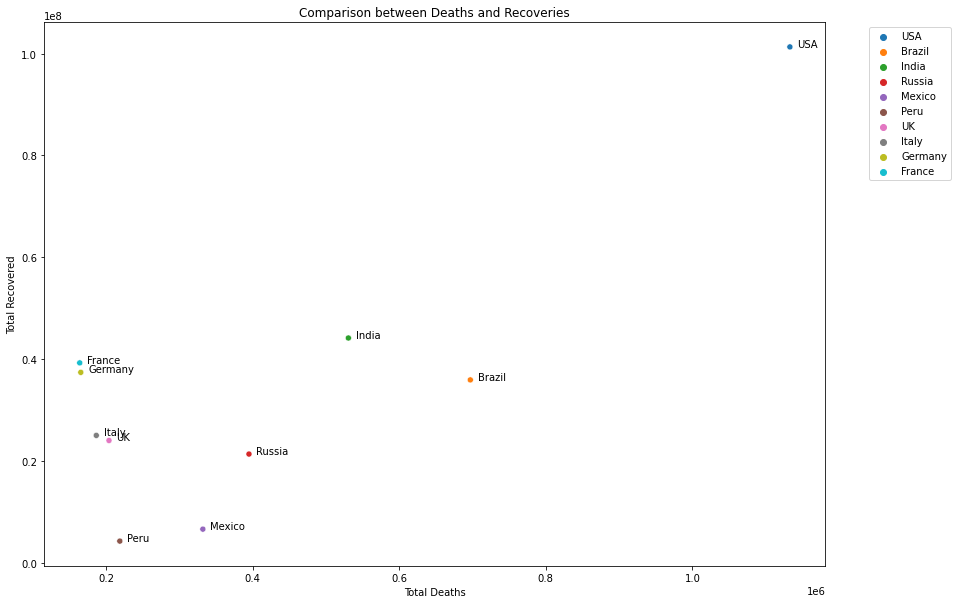

In [53]:
plt.figure(figsize =(14,10))

sns.scatterplot(data = compare, x='Total_Deaths', y = 'Total_Recovered', hue = 'Country')

#Add axis labels and title 
plt.xlabel('Total Deaths')
plt.ylabel("Total Recovered")
plt.title('Comparison between Deaths and Recoveries')

plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
for index, row in compare.iterrows():
    plt.text(row['Total_Deaths'] + 10000, row['Total_Recovered'] + 10000, row['Country'])
plt.show

In [62]:
popDeath = df[['Total_Deaths', 'Country', 'Population']].sort_values(by='Population', ascending = False)
popDeath = popDeath.head(10)
popDeath.head(10)


,Total_Deaths,Country,Population
Serial Number,,,
2,530740.0,India,1.406632e+09
1,1132935.0,USA,3.348053e+08
20,160817.0,Indonesia,2.791345e+08
53,30640.0,Pakistan,2.294890e+08
108,3155.0,Nigeria,2.167469e+08
5,697074.0,Brazil,2.153536e+08
48,29442.0,Bangladesh,1.678857e+08
10,395108.0,Russia,1.458059e+08
19,332198.0,Mexico,1.315628e+08


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total_Cases      231 non-null    float64
 2   Total_Deaths     231 non-null    float64
 3   Total_Recovered  231 non-null    float64
 4   Active_Cases     231 non-null    float64
 5   Total_Test       231 non-null    float64
 6   Population       231 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.4+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

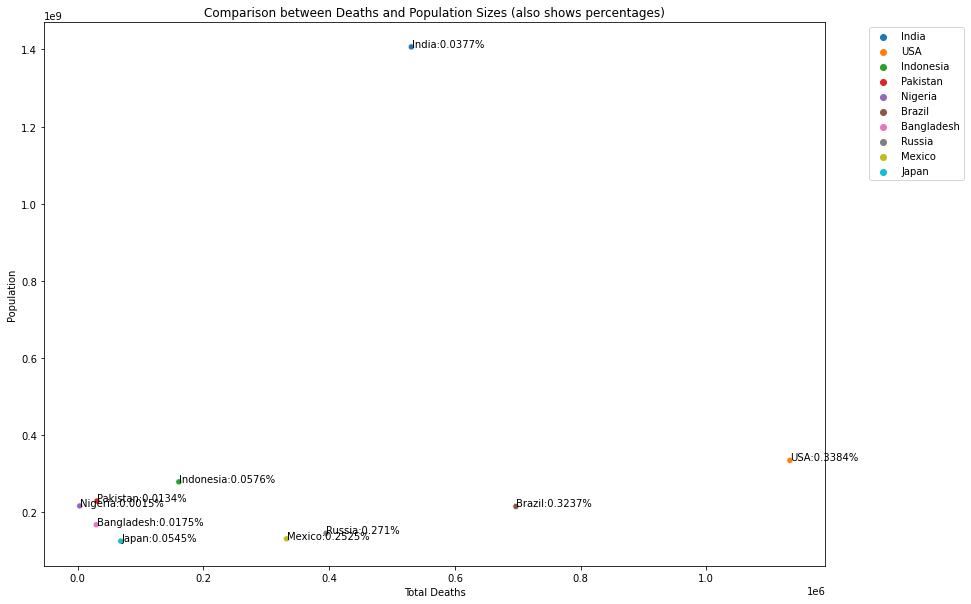

In [83]:
plt.figure(figsize =(14,10))

sns.scatterplot(data = popDeath, x='Total_Deaths', y = 'Population', hue = 'Country')

#Add axis labels and title 
plt.xlabel('Total Deaths')
plt.ylabel("Population")
plt.title('Comparison between Deaths and Population Sizes (also shows percentages)')
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
#Calculate and display the percentage of edeaths per population for each country

for index, row in popDeath.iterrows():
    deaths = row['Total_Deaths']
    population = row["Population"]
    percentdeaths = round(deaths / population *100 , 4)
    plt.text(deaths +500, population +500, f'{row["Country"]}:{percentdeaths}%', fontsize = 10)
plt.show